# Homework 1Multi-class and Multi-Label Classification Using Support Vector Machines

In [45]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import xlrd
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

## (a)Choos 70% of the training set

In [5]:
df = pd.read_csv('data.csv')
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42, test_size=0.30, shuffle=True)
train.index = range(len(train))
test.index = range(len(test))

## (b)i:
### Exact match: The predict labels is exactly the same as the real labels is called exact match. We could use accuracy to calculate the value.
### hamming score/loss: In multiclass classification, the Hamming loss corresponds to the Hamming distance between y_true and y_pred which is similar to the Zero one loss function, the calculation formula = （1/n)*(hamming distance/m) (n:#of instances, m: #of labels)

In [7]:
x_train = train.iloc[:,0:22]
x_test = test.iloc[:,0:22]
fa_train = train.iloc[:,22]
fa_test = test.iloc[:,22]
ge_train = train.iloc[:,23]
ge_test = test.iloc[:,23]
sp_train = train.iloc[:,24]
sp_test = test.iloc[:,24]

## (b)ii Train a SVM for each of the labels,using Gaussian kernels and one versus all classifiers.
### First we train SVM with large and small parameters o n the whole training data and choose the parameter ranges for gamma = np.logspace(-1,2,10) and c = 10^-1,....10^5 .
### Best parameter for gamma=2.154435, C=100.000000.
### After using Gaussian kernels the exact match using all labels and all classes is 0.9874942102825383, the average hamming loss is  0.008028408213679172.

In [43]:
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
#We Assume the threhold for the accuracy is 0.6
clf = SVC(C=10**-1,kernel='rbf')
clf.fit(x_train,fa_train)
fa1 = clf.predict(x_test)
print("The accuracy score",accuracy_score(fa_test,fa1))

The accuracy score 0.8091709124594719


In [8]:
clf2 = SVC(C=10**5,kernel='rbf')
clf2.fit(x_train,fa_train)
fa2 = clf2.predict(x_test)
print("The accuracy score",accuracy_score(fa_test,fa2))

The accuracy score 0.9865678554886521


In [241]:
clf3 = SVC(gamma=0.125,kernel='rbf')
clf3.fit(x_train,fa_train)
fa3 = clf3.predict(x_test)
print("The accuracy score",accuracy_score(fa_test,fa3))

The accuracy score 0.9453450671607225


In [249]:
clf4 = SVC(gamma=100,kernel='rbf')
clf4.fit(x_train,fa_train)
fa4 = clf4.predict(x_test)
print("The accuracy score",accuracy_score(fa_test,fa4))

The accuracy score 0.8161185734136174


### According to the test we make we decide to choose
#### gamma = np.logspace(-1,2,10) and 
#### c = 10^-1,....10^5

In [58]:
params_dict = {"estimator__C": [10**-1,10**0,10**1,10**2,10**3,10**4,10**5], "estimator__gamma":np.logspace(-1,2,10)}
model = OneVsRestClassifier(SVC(kernel='rbf',max_iter=2000))

# Fit the grid search
gs = GridSearchCV(estimator=model, param_grid=params_dict, cv=10,scoring='accuracy')

In [59]:
gs.fit(x_train, fa_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=2000, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          n_jobs=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'estimator__C': [0.1, 1, 10, 100, 1000, 10000, 100000], 'estimator__gamma': array([  0.1    ,   0.21544,   0.46416,   1.     ,   2.15443,   4.64159,
        10.     ,  21.54435,  46.41589, 100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [94]:
fa_pred = gs.predict(x_test)

In [66]:
gs1 = GridSearchCV(estimator=model, param_grid=params_dict, cv=10,scoring='accuracy')
gs1.fit(x_train,ge_train)
ge_pred = gs1.predict(x_test)

In [72]:
gs2 = GridSearchCV(estimator=model, param_grid=params_dict, cv=10,scoring='accuracy')
gs2.fit(x_train,sp_train)
sp_pred=gs2.predict(x_test)

In [74]:
gs.best_params_
best_gamma = gs.best_params_ ['estimator__gamma']  
best_C = gs.best_params_['estimator__C']
print('Best score using Gaussian kernels and one versus all classifiers = %f (gamma=%f, C=%f)' % (gs.best_score_, best_gamma, best_C))

Best score using Gaussian kernels and one versus all classifiers = 0.993646 (gamma=2.154435, C=100.000000)


In [100]:
def hamming_multi(y_true,y_pred):
    ham_distance=[]
    for i in range(len(y_pred)):
        ham_distance.append(hamming_loss(y_true.values.tolist()[i],y_pred.values.tolist()[i]))
    return(np.mean(ham_distance))

def exactmatch(y_true,y_pred):
    exact_match=0
    for i in range(len(y_true)):
        if y_pred.iloc[i,0]==y_true.iloc[i,22] and y_pred.iloc[i,1]==y_true.iloc[i,23] and y_pred.iloc[i,2]==y_true.iloc[i,24]:
            exact_match+=1
    return exact_match/len(y_true)

In [101]:
pre_label = pd.DataFrame()
pre_label["Family"] = fa_pred
pre_label["Genus"] = ge_pred
pre_label["Species"] = sp_pred

print("The exact match for all the labels:",exactmatch(test,pre_label))
print("The average hamming loss for all the labels:",hamming_multi(test.iloc[:,22:25],pre_label))

The exact match for all the labels: 0.9874942102825383
The average hamming loss for all the labels: 0.008028408213679172


## (C) iii:Repeat 1(b)ii and L1-penalized SVMs

### The exact match for all the labels = 0.9101435849930524,The average hamming loss=0.05697081982399259.

In [46]:
svm = OneVsRestClassifier(LinearSVC(loss='squared_hinge', penalty='l1', dual=False,max_iter=5000))
params_dict1 = {"estimator__C": np.logspace(-1, 2, 10),               }
# Fit the grid search
gs1 = GridSearchCV(estimator=svm, param_grid=params_dict1,cv=10,scoring='accuracy')

In [48]:
gs1.fit(x_train, fa_train)
fa_pred1 = gs1.predict(x_test)

In [50]:
gs2 = GridSearchCV(estimator=svm, param_grid=params_dict1,cv=10,scoring='accuracy')

In [51]:
gs2.fit(x_train, ge_train)
ge_pred1 = gs2.predict(x_test)

In [53]:
gs3 = GridSearchCV(estimator=svm, param_grid=params_dict1,cv=10,scoring='accuracy')

In [54]:
gs3.fit(x_train, sp_train)
sp_pred1 = gs3.predict(x_test)

In [102]:
pre_label1 = pd.DataFrame()
pre_label1["Family"] = fa_pred1
pre_label1["Genus"] = ge_pred1
pre_label1["Species"] = sp_pred1

print("The exact match for all the labels:",exactmatch(test,pre_label1))
print("The average hamming loss for all the labels:",hamming_multi(test.iloc[:,22:25],pre_label1))

The exact match for all the labels: 0.9101435849930524
The average hamming loss for all the labels: 0.05697081982399259


## (b) iv:Using SMOTE to remedy the class imbalance
### The exact match for all the labels = 0.9884205650764243，The average hamming loss =  0.008182800679326847.

## Conclusion:
### According to the classifiers we trained the SVM using gaussian kernel and linear kernel, and after smote using gaussian kernel as well. The conclusion is that when we don't remedy the imbalance data, the linear kenerl better performs worse than the gaussian kernel using the same method to train each label and one vs all classifiers. After we using smote, the result is better than we not smote using gaussian kernel. the best performance classifier is  the Gaussian kernel with the SMOTE method. 


In [10]:
from sklearn.preprocessing import MultiLabelBinarizer

In [11]:
sme = SMOTE()
fa_train = train.iloc[:,22]
xfa_res, fa_res = sme.fit_sample(x_train, fa_train)
xge_res, ge_res = sme.fit_sample(x_train, ge_train)
xsp_res,sp_res = sme.fit_sample(x_train, sp_train)


In [14]:
params_dict1 = {"estimator__C": [10**-1,10**0,10**1,10**2], "estimator__gamma":np.logspace(0,2,5)}
model1 = OneVsRestClassifier(SVC(kernel='rbf',max_iter=2000))

In [22]:
gs_smote1 = GridSearchCV(estimator=model1, param_grid=params_dict1, cv=10,scoring='accuracy')

In [23]:
gs_smote1.fit(xfa_res, fa_res)
fa_smote_pred = gs_smote1.predict(x_test)

In [15]:
gs_smote2 = GridSearchCV(estimator=model1, param_grid=params_dict1, cv=10,scoring='accuracy')

In [16]:
gs_smote2.fit(xge_res, ge_res)
ge_smote_pred = gs_smote2.predict(x_test)

In [18]:
gs_smote3 = GridSearchCV(estimator=model1, param_grid=params_dict1, cv=10,scoring='accuracy')

In [19]:
gs_smote3.fit(xsp_res,sp_res)
sp_smote_pred = gs_smote3.predict(x_test)

In [103]:
pre_label2 = pd.DataFrame()
pre_label2["Family"] = fa_smote_pred 
pre_label2["Genus"] = ge_smote_pred
pre_label2["Species"] = sp_smote_pred

print("The exact match for all the labels:",exactmatch(test,pre_label2))
print("The average hamming loss for all the labels:",hamming_multi(test.iloc[:,22:25],pre_label2))

The exact match for all the labels: 0.9884205650764243
The average hamming loss for all the labels: 0.008182800679326847


# Homework2 K-means cluster
## After the Monte-Carlo Simulation: 
### Average hamming distance for all the clusters = 0.8456462531330827, the total hamming distance = 6084.42479129253, the std= 0.0015865521728015127.

## (a):Use k-means clustering on the whole dataset
### According to the silhoutte score we find the best k = 4.

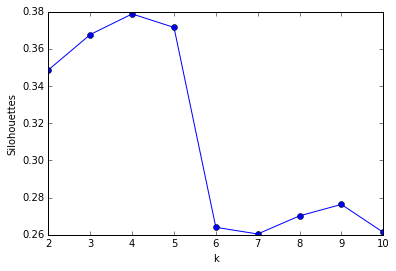

In [199]:
data = df.iloc[:,:22].values
Scores = []  
for k in range(2, 11):
    estimator = KMeans(n_clusters=k)  
    cluster_labels=estimator.fit(data)
    Scores.append(silhouette_score(data,estimator.labels_, metric='euclidean'))
X = range(2, 11)
plt.xlabel('k')
plt.ylabel('Silohouettes')
plt.plot(X, Scores, 'o-')
plt.show()

## Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that I calculate.

In [35]:
def Hamming(y_true,y_pred):
    ham_distance=[]
    for i in range(len(y_pred)):
        ham_distance.append(hamming_loss(y_true,y_pred.values.tolist()[i]))
    return(np.mean(ham_distance)*3)

In [292]:
estimator=KMeans(n_clusters=4)
res=estimator.fit_predict(data)
lable_pred=estimator.labels_
centroids=estimator.cluster_centers_
inertia=estimator.inertia_

In [38]:
aver_dis = []
for i in range(1,51,1):
    c1_label=[]
    c2_label=[]
    c3_label=[]
    c4_label=[]
    estimator=KMeans(n_clusters=4)
    res=estimator.fit_predict(data)
    lable_pred=estimator.labels_
    c1 = pd.DataFrame(columns=df.columns)
    c2 = pd.DataFrame(columns=df.columns)
    c3 = pd.DataFrame(columns=df.columns)
    c4 = pd.DataFrame(columns=df.columns) 
    for i in range(len(data)):
        if int(lable_pred[i])==0:
            c1 = c1.append(df.iloc[i,:])
        if int(lable_pred[i])==1:
            c2 = c2.append(df.iloc[i,:])
        if int(lable_pred[i])==2:
            c3 = c3.append(df.iloc[i,:])
        if int(lable_pred[i])==3:
            c4 = c4.append(df.iloc[i,:])
    fa_result1 = pd.value_counts(c1["Family"].values)
    fa_result2 = pd.value_counts(c2["Family"].values)
    fa_result3 = pd.value_counts(c3["Family"].values)
    fa_result4 = pd.value_counts(c4["Family"].values)
    ge_result1 = pd.value_counts(c1["Genus"].values)
    ge_result2 = pd.value_counts(c2["Genus"].values)
    ge_result3 = pd.value_counts(c3["Genus"].values)
    ge_result4 = pd.value_counts(c4["Genus"].values)
    sp_result1 = pd.value_counts(c1["Species"].values)
    sp_result2 = pd.value_counts(c2["Species"].values)
    sp_result3 = pd.value_counts(c3["Species"].values)
    sp_result4 = pd.value_counts(c4["Species"].values)
    c1_label=[fa_result1.index[0],ge_result1.index[0],sp_result1.index[0]]
    c2_label=[fa_result2.index[0],ge_result2.index[0],sp_result2.index[0]]
    c3_label=[fa_result3.index[0],ge_result3.index[0],sp_result3.index[0]]
    c4_label=[fa_result4.index[0],ge_result4.index[0],sp_result4.index[0]]
    c1_pred = c1.iloc[:,22:25]
    c2_pred = c2.iloc[:,22:25]
    c3_pred = c3.iloc[:,22:25]
    c4_pred = c4.iloc[:,22:25]
    h1 = Hamming(c1_label,c1_pred)
    h2 = Hamming(c2_label,c2_pred)
    h3 = Hamming(c3_label,c3_pred)
    h4 = Hamming(c4_label,c4_pred)
    aver_dis.append((h1+h2+h3+h4)/4)

In [41]:
print("The average of the distance after 50 times procedures:",np.mean(aver_dis))
print("The std of the distance after 50 times procedures:",np.std(aver_dis))

The average of the distance after 50 times procedures: 0.8456462531330827
The std of the distance after 50 times procedures: 0.0015865521728015127
